In [1]:
#Dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
#load the data
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path,index_col=0)
df.head(5)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the IsTrading column from the dataframe.
Cleaned_df = df.loc[df['IsTrading']==True]
Cleaned_df = Cleaned_df.drop(columns=['IsTrading'])
Cleaned_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [4]:
# Remove all rows that have at least one null value.
Cleaned_df= Cleaned_df.dropna()

In [5]:
# Filter for cryptocurrencies that have been mined.
Cleaned_df = Cleaned_df[Cleaned_df.Algorithm.isna() == False]
print(Cleaned_df.shape)
Cleaned_df.head(10)

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [6]:
# Filter for cryptocurrencies that have been mined
Cleaned_df = Cleaned_df.loc[Cleaned_df['TotalCoinsMined'] != 0]

In [7]:
# deleting coinName column since its not numeric.
Cleaned_df = Cleaned_df.drop(columns=['CoinName'])

In [8]:
# Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, into numerical data. To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?
X = pd.get_dummies(Cleaned_df, columns=["Algorithm", "ProofType"])

In [9]:
# check how it changed
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# got rid of anything that was not numerica and added algorithm and prooftype making the data columns longer.

In [11]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler()
crypto_scale = scaler.fit_transform(X)
crypto_scale[0:5]

array([[-0.11674788, -0.15286468, -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.06137164, -0.07523548, -0.0433555 , -0.06137164, -0.06137164,
        -0.0433555 , -0.0433555 , -0.19226279, -0.06137164, -0.09731237,
        -0.0433555 , -0.11536024, -0.07523548, -0.0433555 , -0.0433555 ,
        -0.15176505, -0.0433555 , -0.13105561, -0.0433555 , -0.0433555 ,
        -0.08695652, -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.06137164, -0.0433555 , -0.08695652, -0.08695652, -0.08695652,
        -0.0433555 , -0.13105561, -0.13827675, -0.13827675, -0.0433555 ,
        -0.06137164, -0.0433555 , -0.07523548, -0.1815096 , -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.07523548, -0.15811388, -0.3145935 ,
        -0.0433555 , -0.08695652, -0.07523548, -0.06137164, -0.0433555 ,
         1.38873015, -0.0433555 , -0.0433555 , -0.06137164, -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.39836623, -0.0

In [13]:
# use PCA
pca = PCA(n_components=3)
pca_crypto_ = pca.fit_transform(crypto_scale)
pca_crypto_
pca_df = pd.DataFrame(data=pca_crypto_,columns=["PC_1","PC_2", "PC_3"],index=Cleaned_df.index)

In [14]:
# USING TSNE
tsne = TSNE(learning_rate=30)
# Reduce dimensions
tsne_features = tsne.fit_transform(pca_df)

In [15]:
# features
pca_df['y'] = tsne_features[:,1]
pca_df['x'] = tsne_features[:,0]


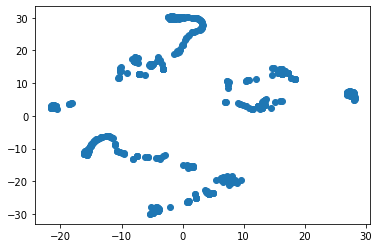

In [16]:
# plot
plt.scatter(pca_df['x'], pca_df['y'])
plt.show()

In [17]:
# there is distinct clusters.

In [18]:
# Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of k it appears.
inertia = []
k = list(range(1, 11))

In [19]:
# creating the loop
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

C:\Users\Sergio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [20]:
elbow_plot = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_plot)
elbow_df.head()

,k,inertia
0,1,246057.974898
1,2,108793.604073
2,3,64184.708901
3,4,33119.262003
4,5,24831.335079


In [ ]:
# elbow plotting
